# Data Wrangling with Pandas II

<img src="images/pipelines.jpg" width=50% style="margin-left:auto; margin-right:auto">


<div align = "left"> 
    <br>
    <br>
Image by <a href="https://pixabay.com/photos/lost-places-factory-old-abandoned-2178884/">Hands off my tags! Michael Gaida</a> from Pixabay.
</div>

## Outline

In this class we will talk more about:

- ## Useful packages: Numpy and Random
- "Tips and tricks" for working with `pandas`
- Combining Datasets: Concat and Append
- Visualizing Data using `seaborn` and `pandas`
- Additional Notes you may found helpful

## Useful packages: Numpy and Random

- Generating Random numbers using the [random package](https://docs.python.org/3/library/random.html)
- Using [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html)

In [1]:
import random
import numpy as np

In [72]:
# Generate a random integer (!) between a and b (here a=0, b=50)

random.randint(a=0, b=50)

9

In [249]:
# Generate a random number (int) (!) between a and b (here a=0, b=50) in steps. For e.g., an "even number"

random.randrange(0, 50, step=2) + 1

33

In [251]:
# Generate a random number (!) between a and b (here a=0, b=50) in "step". Can use tricks to divide.

random.randrange(0, 100, step=1) / 10

7.8

In [270]:
# for loop to generate 10 random numbers

for i in range(10):
    print(random.randrange(5, 50))

23
19
10
7
11
35
37
43
42
41


In [278]:
# for loop to generate 10 random numbers
# and store into a list

rints = []
for i in range(10):
    rints.append(random.randrange(5, 50))

rints

[21, 48, 46, 35, 18, 10, 42, 25, 49, 10]

In [279]:
# list comprehension to generate 10 random numbers

[random.randrange(5, 50) for i in range(10)]

[12, 33, 16, 32, 40, 26, 26, 26, 5, 31]

In [280]:
# list comprehension to generate 10 random numbers
# and store into a list

rints2 = [random.randrange(5, 50) for i in range(10)]
rints2

[47, 8, 35, 10, 12, 13, 31, 41, 42, 35]

In [281]:
np.arange(5, 50)

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [283]:
rints3 = np.arange(5, 50)

In [288]:
random.choice(rints3)

46

In [289]:
# another way
for i in range(10):
    print(random.choice(rints3))

32
39
23
20
25
24
13
35
39
26


### Seeds

What if you want the same random number every time? (Trust me, it's useful!)

You can set the seed.

In [326]:
# Setting a seed to a specific number
random.seed(3.1415)

random.randint(0, 500)

18

## Numpy

In [329]:
# Generate 10 random floats (!) between 0 and 1
# Yes, numpy also has a random number generator

np.random.rand(10)

array([0.54729998, 0.02003206, 0.76955012, 0.73877622, 0.79553496,
       0.90364777, 0.83038719, 0.81306473, 0.08363546, 0.15247722])

In [330]:
# store that into a variable

r = np.random.rand(10)

In [331]:
# Check the type:

type(r)

numpy.ndarray

### What is a numpy array?

Let's find out!

[Click here](https://numpy.org/doc/stable/user/absolute_beginners.html#what-is-an-array)

In [ ]:
# but numpy is a lot more useful, it is the primary tool used for scientific computing!

## Working with Pandas to load data

In [1]:
import pandas as pd

### Always use RELATIVE paths!!

In [2]:
pwd

'/Users/firasm/Sync/Teaching/ubco/2022_23/2022WT1/301/data301_course/notes/week05/Class5B'

In [3]:
!ls data/

chord-fingers1.csv   state-abbrevs.csv    state-population.csv
chord-fingers2.csv   state-areas.csv


### What if your data is not UTF-8 encoded? 
*(Hint: You will get a UnicodeDecodeError)*

In [4]:
url = "http://nfdp.ccfm.org/download/data/csv/NFD%20-%20Area%20burned%20by%20cause%20class%20-%20EN%20FR.csv"

dataset = pd.read_csv(url)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 8: invalid continuation byte

#### Demo

Now what!?

Now we google it...

And according to [this stack overflow page](https://stackoverflow.com/a/18172249): we should try:

```
pd.read_csv(url, encoding='latin')
```

So let's give it a shot:

In [5]:
pd.read_csv(url, encoding="latin")

# Works!!

,Year,Année,ISO,Jurisdiction,Juridiction,Cause,Origine,Area (hectares),Data Qualifier,Superficie (en hectare),Qualificatifs de données
0,1990,1990,AB,Alberta,Alberta,Human activity,Activités humaines,2393.8,a,2393.8,a
1,1990,1990,AB,Alberta,Alberta,Lightning,Foudre,55482.6,a,55482.6,a
2,1990,1990,AB,Alberta,Alberta,Unspecified,Indéterminée,1008.8,a,1008.8,a
3,1990,1990,BC,British Columbia,Colombie-Britannique,Human activity,Activités humaines,40278.3,a,40278.3,a
4,1990,1990,BC,British Columbia,Colombie-Britannique,Lightning,Foudre,35503.5,a,35503.5,a
...,...,...,...,...,...,...,...,...,...,...,...
1054,2021,2021,PC,Parks Canada,Parcs Canada,Unspecified,Indéterminée,42538.0,e,42538.0,e
1055,2021,2021,PE,Prince Edward Island,Île-du-Prince-Édouard,Unspecified,Indéterminée,0.1,e,0.1,e
1056,2021,2021,QC,Quebec,Québec,Unspecified,Indéterminée,49748.0,e,49748.0,e
1057,2021,2021,SK,Saskatchewan,Saskatchewan,Unspecified,Indéterminée,956084.0,e,956084.0,e


### What if your data is not comma-separated?

In [7]:
chord1 = pd.read_csv("data/chord-fingers1.csv")
chord1.head()

ParserError: Error tokenizing data. C error: Expected 10 fields in line 7, saw 11


#### Demo

Now what!?

Now we google the error message...

And according to [this stack overflow page](https://stackoverflow.com/a/59429173): we should try:

```
pd.read_csv('data/chord-fingers1.csv', sep=';')
```

So let's give it a shot:

In [10]:
chord1 = pd.read_csv("data/chord-fingers1.csv", sep=";")
chord1.head()

,CHORD_ROOT,CHORD_TYPE,CHORD_STRUCTURE,FINGER_POSITIONS,NOTE_NAMES
0,A#,13,1;3;5;b7;9;11;13,"x,1,0,2,3,4","A#,C##,G#,B#,F##"
1,A#,13,1;3;5;b7;9;11;13,"4,x,3,2,1,1","A#,G#,B#,C##,F##"
2,A#,13,1;3;5;b7;9;11;13,"1,x,1,2,3,4","A#,G#,C##,F##,B#"
3,A#,7(#9),1;3;5;b7;#9,"x,1,0,2,4,3","A#,C##,G#,B##,E#"
4,A#,7(#9),1;3;5;b7;#9,"2,1,3,3,3,x","A#,C##,G#,B##,E#"


In [11]:
# Let's load in the second part of the dataset in the same way:

chord2 = pd.read_csv("data/chord-fingers2.csv", sep=";")
chord2.head()

,CHORD_ROOT,CHORD_TYPE,CHORD_STRUCTURE,FINGER_POSITIONS,NOTE_NAMES
0,Ab,6,1;3;5;6,"x,4,2,3,1,x","Ab,C,F,Ab"
1,Ab,6,1;3;5;6,"x,x,3,2,4,1","Ab,C,F,Ab"
2,Ab,6,1;3;5;6,"2,x,1,4,x,x","Ab,F,C"
3,Ab,6,1;3;5;6,"1,x,x,3,4,x","Ab,C,F"
4,Ab,6,1;3;5;6,"x,x,1,3,1,4","Ab,Eb,F,C"


In [12]:
len(chord1)

598

In [13]:
len(chord2)

2034

In [14]:
len(chord1) + len(chord2)

2632

## Combining DataFrames together

We saw that our dataset came in two parts (`chord1` and `chord2`).

A common task in data analysis is to merge or combine datasets together.
There are several combinations we can do. 

Let's look at just a basic one:

### Using `.concat()`

[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) on the `.concat()` function

![](https://pandas.pydata.org/docs/_images/merging_concat_basic.png)

In [15]:
# chord1['New Column'] ='Firas'
chord1

,CHORD_ROOT,CHORD_TYPE,CHORD_STRUCTURE,FINGER_POSITIONS,NOTE_NAMES
0,A#,13,1;3;5;b7;9;11;13,"x,1,0,2,3,4","A#,C##,G#,B#,F##"
1,A#,13,1;3;5;b7;9;11;13,"4,x,3,2,1,1","A#,G#,B#,C##,F##"
2,A#,13,1;3;5;b7;9;11;13,"1,x,1,2,3,4","A#,G#,C##,F##,B#"
3,A#,7(#9),1;3;5;b7;#9,"x,1,0,2,4,3","A#,C##,G#,B##,E#"
4,A#,7(#9),1;3;5;b7;#9,"2,1,3,3,3,x","A#,C##,G#,B##,E#"
...,...,...,...,...,...
593,Ab,m7,1;b3;5;b7,"1,3,1,1,1,x","Ab,Eb,Gb,Cb,Eb"
594,Ab,dim,1;b3;b5,"x,x,4,3,1,2","Ab,Cb,Ebb,Ab"
595,Ab,dim,1;b3;b5,"x,1,2,4,3,x","Ab,Ebb,Ab,Cb"
596,Ab,6,1;3;5;6,"x,x,1,1,1,1","Eb,Ab,C,F"


In [33]:
pd.concat([chord1, chord2])

,CHORD_ROOT,CHORD_TYPE,CHORD_STRUCTURE,FINGER_POSITIONS,NOTE_NAMES,New Column
0,A#,13,1;3;5;b7;9;11;13,"x,1,0,2,3,4","A#,C##,G#,B#,F##",Firas
1,A#,13,1;3;5;b7;9;11;13,"4,x,3,2,1,1","A#,G#,B#,C##,F##",Firas
2,A#,13,1;3;5;b7;9;11;13,"1,x,1,2,3,4","A#,G#,C##,F##,B#",Firas
3,A#,7(#9),1;3;5;b7;#9,"x,1,0,2,4,3","A#,C##,G#,B##,E#",Firas
4,A#,7(#9),1;3;5;b7;#9,"2,1,3,3,3,x","A#,C##,G#,B##,E#",Firas
...,...,...,...,...,...,...
2029,G,sus4,1;4;5,"x,1,2,3,4,1","G,D,G,C,D",NaN
2030,G,sus4,1;4;5,"x,x,3,4,1,1","G,C,D,G",NaN
2031,G,6/9,1;3;5;6;9,"2,1,1,1,3,4","G,B,E,A,D,G",NaN
2032,G,6/9,1;3;5;6;9,"x,x,2,1,3,4","G,B,E,A",NaN


In [16]:
# You NEED to save the output of all pandas function, do NOT use the "inplace" argument, it will be deprecated soon

chords = pd.concat([chord1, chord2])

chords

,CHORD_ROOT,CHORD_TYPE,CHORD_STRUCTURE,FINGER_POSITIONS,NOTE_NAMES
0,A#,13,1;3;5;b7;9;11;13,"x,1,0,2,3,4","A#,C##,G#,B#,F##"
1,A#,13,1;3;5;b7;9;11;13,"4,x,3,2,1,1","A#,G#,B#,C##,F##"
2,A#,13,1;3;5;b7;9;11;13,"1,x,1,2,3,4","A#,G#,C##,F##,B#"
3,A#,7(#9),1;3;5;b7;#9,"x,1,0,2,4,3","A#,C##,G#,B##,E#"
4,A#,7(#9),1;3;5;b7;#9,"2,1,3,3,3,x","A#,C##,G#,B##,E#"
...,...,...,...,...,...
2029,G,sus4,1;4;5,"x,1,2,3,4,1","G,D,G,C,D"
2030,G,sus4,1;4;5,"x,x,3,4,1,1","G,C,D,G"
2031,G,6/9,1;3;5;6;9,"2,1,1,1,3,4","G,B,E,A,D,G"
2032,G,6/9,1;3;5;6;9,"x,x,2,1,3,4","G,B,E,A"


### Using `.rename()`

[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) on the `.rename()` function: 

In [17]:
# Capitals annoy me!

list(chords.columns)

['CHORD_ROOT',
 'CHORD_TYPE',
 'CHORD_STRUCTURE',
 'FINGER_POSITIONS',
 'NOTE_NAMES']

In [18]:
chords = chords.rename(
     
)
chords.head() 

,Chord,Type,Structure,Finger,Notes
0,A#,13,1;3;5;b7;9;11;13,"x,1,0,2,3,4","A#,C##,G#,B#,F##"
1,A#,13,1;3;5;b7;9;11;13,"4,x,3,2,1,1","A#,G#,B#,C##,F##"
2,A#,13,1;3;5;b7;9;11;13,"1,x,1,2,3,4","A#,G#,C##,F##,B#"
3,A#,7(#9),1;3;5;b7;#9,"x,1,0,2,4,3","A#,C##,G#,B##,E#"
4,A#,7(#9),1;3;5;b7;#9,"2,1,3,3,3,x","A#,C##,G#,B##,E#"


### Using `.replace()`

[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) on the `.replace()` function: 

In [20]:
chords_cleaned = chords.replace("A#", "A-sharp")
chords_cleaned

,Chord,Type,Structure,Finger,Notes
0,A-sharp,13,1;3;5;b7;9;11;13,"x,1,0,2,3,4","A#,C##,G#,B#,F##"
1,A-sharp,13,1;3;5;b7;9;11;13,"4,x,3,2,1,1","A#,G#,B#,C##,F##"
2,A-sharp,13,1;3;5;b7;9;11;13,"1,x,1,2,3,4","A#,G#,C##,F##,B#"
3,A-sharp,7(#9),1;3;5;b7;#9,"x,1,0,2,4,3","A#,C##,G#,B##,E#"
4,A-sharp,7(#9),1;3;5;b7;#9,"2,1,3,3,3,x","A#,C##,G#,B##,E#"
...,...,...,...,...,...
2029,G,sus4,1;4;5,"x,1,2,3,4,1","G,D,G,C,D"
2030,G,sus4,1;4;5,"x,x,3,4,1,1","G,C,D,G"
2031,G,6/9,1;3;5;6;9,"2,1,1,1,3,4","G,B,E,A,D,G"
2032,G,6/9,1;3;5;6;9,"x,x,2,1,3,4","G,B,E,A"


### Using `.drop()`

[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) on the `.drop()` function: 

In [22]:
chords_cleaned

,Chord,Type,Structure,Finger,Notes
0,A-sharp,13,1;3;5;b7;9;11;13,"x,1,0,2,3,4","A#,C##,G#,B#,F##"
1,A-sharp,13,1;3;5;b7;9;11;13,"4,x,3,2,1,1","A#,G#,B#,C##,F##"
2,A-sharp,13,1;3;5;b7;9;11;13,"1,x,1,2,3,4","A#,G#,C##,F##,B#"
3,A-sharp,7(#9),1;3;5;b7;#9,"x,1,0,2,4,3","A#,C##,G#,B##,E#"
4,A-sharp,7(#9),1;3;5;b7;#9,"2,1,3,3,3,x","A#,C##,G#,B##,E#"
...,...,...,...,...,...
2029,G,sus4,1;4;5,"x,1,2,3,4,1","G,D,G,C,D"
2030,G,sus4,1;4;5,"x,x,3,4,1,1","G,C,D,G"
2031,G,6/9,1;3;5;6;9,"2,1,1,1,3,4","G,B,E,A,D,G"
2032,G,6/9,1;3;5;6;9,"x,x,2,1,3,4","G,B,E,A"


In [45]:
chords_cleaned = chords_cleaned.drop(["Notes", "New Column"], axis="columns")

In [46]:
sorted(list(chords_cleaned.columns))

['Chord', 'Finger', 'Structure', 'Type']

In [ ]:
chords = chords[sorted(list(chords.columns))]

In [ ]:
chords

### Using `.merge()`

[User Guide on Merging Dataframes](https://pandas.pydata.org/docs/user_guide/merging.html) on the `.merge()` function

<img src ="images/merge.png" width = "50%">

## Visualizing Data using `seaborn` and `pandas`

This is a preview of content coming later!

In [49]:
# You may need to install seaborn:
# Remember the command to install a package `conda install -c conda-forge seaborn`

import seaborn as sns

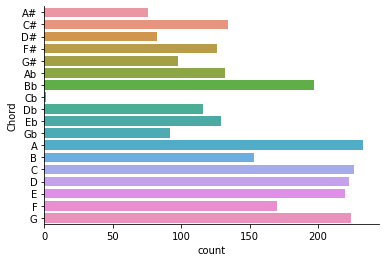

In [51]:
sns.countplot(y="Chord", data=chords)
sns.despine()

## Additional Notes on Handling Missing Data

See [additional section](Wrangling_notes) titled "Wrangling Notes".

## Attribution

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*